<table>
   <tr>
     <td><img src="./images/epf-header.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left"></td>
      </tr>
</table>

## <center>TP QISKit</center>
## <center>Full adder</center>

### <span style="color:blue"><em>Jean-Michel Torres, IBM Q Hub France, torresjm@fr.ibm.com</em></span>

***Star***, download, ou utiliser depuis `mybinder` : 

# https://github.com/jmit34/20200327




Ceci est un additionneur sur 2 bits :

<img src="./images/adder.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600px" align="center">

In [49]:
%matplotlib inline
from math import floor
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit import Aer
#print(Aer.backends())
backend = Aer.get_backend('qasm_simulator')

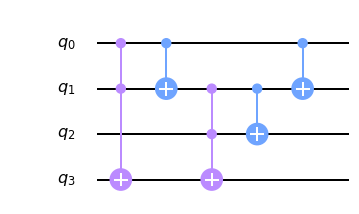

In [53]:
# fabriquons la fonction adder, sur 4 qubits, selon le schéma ci-dessus: 
# sans faire les mesures, et on va définir cette fonction 
# comme une sous routine, de manière à l'utiliser pour tester les 
# différentes valeurs d'entrée
# on l'appelle adder: 

adder = QuantumCircuit(4)

# ici : construisez vous-même votre additionneur quantique 
# 2 qubit avec retenue 


# on le convertit en gate et on le dessine:


adder.draw(output='mpl')

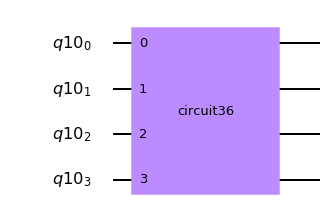

In [54]:
# fabriquons la fonction adder, sur 4 qubits, selon le schéma ci-dessus: 
# sans faire les mesures, et on va définir cette fonction 
# comme une sous routine, de manière à l'utiliser pour tester les 


adder.to_instruction()


qr = QuantumRegister(4)
visu = QuantumCircuit(qr)
visu.append(adder,qr)

visu.draw(output='mpl')

In [55]:
# now let's use the adder in a circuit, and try all possible entries
cr = ClassicalRegister(4)

print("            A   B  Carry Retenue Somme")
print("           --- --- ----- ------- -----")

for i in range(8):
    circ = QuantumCircuit(qr,cr)
    if floor((i/2)%2):
        circ.x(qr[0])
    if i%2:
        circ.x(qr[1])
    if i>3:
        circ.x(qr[2])
        
        
    circ.append(adder,[qr[0],qr[1],qr[2],qr[3]])
    circ.measure(qr,cr)
    
    print(f"données :   {(floor(i/2))%2}   {(i%2)*1}    {(i>3)*1}")
    job = execute(circ,backend, shots=1024)
    result = job.result()
    for x in (result.get_counts(circ)):
        print(f"résultats:  {x[3]}   {x[2]}           {x[0]}      {x[1]}")
    print("           --- --- ----- ------- -----")

            A   B  Carry Retenue Somme
           --- --- ----- ------- -----
données :   0   0    0
résultats:  0   0           0      0
           --- --- ----- ------- -----
données :   0   1    0
résultats:  0   1           0      1
           --- --- ----- ------- -----
données :   1   0    0
résultats:  1   0           0      1
           --- --- ----- ------- -----
données :   1   1    0
résultats:  1   1           1      0
           --- --- ----- ------- -----
données :   0   0    1
résultats:  0   0           0      1
           --- --- ----- ------- -----
données :   0   1    1
résultats:  0   1           1      0
           --- --- ----- ------- -----
données :   1   0    1
résultats:  1   0           1      0
           --- --- ----- ------- -----
données :   1   1    1
résultats:  1   1           1      1
           --- --- ----- ------- -----


### Tourner sur machine, avec par exemple : a=0, b=1, carry=1